In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
df = pd.read_csv("supermarket_sales_dirty.csv")


In [3]:
df.shape

(1000, 17)

In [4]:
df.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                    object
Tax 5%                     float64
Total                       object
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage     object
gross income                object
Rating                     float64
dtype: object

## Identifying Distinct Values and renaming mis-spelled values

In [5]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].value_counts())
    print('')


Invoice ID
785-13-7708    1
371-85-5789    1
837-55-7229    1
635-40-6220    1
512-91-0811    1
              ..
760-54-1821    1
407-63-8975    1
605-72-4132    1
875-46-5808    1
735-06-4124    1
Name: Invoice ID, Length: 905, dtype: int64

Branch
A    332
C    325
B    324
Name: Branch, dtype: int64

City
Yangon        335
Mandalay      329
Naypyitaw     324
Yangono         3
Yangon0         2
Naypyitawe      1
Naypyitay       1
Naypyitawp      1
Name: City, dtype: int64

Customer type
Member    501
Normal    499
Name: Customer type, dtype: int64

Gender
Male      497
Female    494
Name: Gender, dtype: int64

Product line
Fashion accessories            177
Food and beverages             171
Electronic accessories         164
Sports and travel              163
Home and lifestyle             158
Health and beauty              151
Electronic access                2
Sports and tr                    1
Home and lifest                  1
Fashion access                   1
Electronic a     

In [6]:
df['Quantity'].replace({'few','*(()','%*&','few%&'},np.nan,inplace=True)
df['gross margin percentage'].replace({'1','5','same',np.nan},'4.761904762',inplace=True)
df['gross income'].replace({'low'},df['gross income'].min(),inplace=True)


Branch has 3 Objects (A,B,C) 

In [7]:
df.drop_duplicates("City")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
13,252-56-2699,A,Yangono,Normal,Male,Food and beverages,43.19,10,21.5950,453.495,2/7/2019,16:48,Ewallet,431.90,4.761904762,21.595,8.2
16,656-95-9349,A,Yangon0,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761904762,24.1255,4.6
42,354-25-5821,B,NaN,Member,Female,Sports and travel,69.12,6,20.7360,435.456,2/8/2019,13:03,Cash,414.72,4.761904762,20.736,5.6
140,731-81-9469,C,Naypyitay,Member,Female,Sports and travel,89.80,10,44.9000,942.9,1/23/2019,13:00,Credit card,898.00,4.761904762,44.9,5.4
141,280-17-4359,C,Naypyitawe,Member,Male,Health and beauty,90.50,10,45.2500,950.25,1/25/2019,13:48,Cash,905.00,4.761904762,45.25,8.1
143,488-25-4221,C,Naypyitawp,Member,Female,Food and beverages,30.41,1,1.5205,31.9305,2/22/2019,10:36,Credit card,NaN,4.761904762,1.5205,8.4


In [8]:
df["City"].replace({'Yangono','Yangon0'},'Yangon',inplace=True)
df["City"].replace({'Naypyitay','Naypyitawe','Naypyitawp'},'Naypyitaw',inplace=True)
df.drop_duplicates("City")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
42,354-25-5821,B,NaN,Member,Female,Sports and travel,69.12,6,20.7360,435.456,2/8/2019,13:03,Cash,414.72,4.761904762,20.736,5.6


City has 3 Object(Yangon,Naypyitaw,Mandalay) 
Another observation we get is each Branch is related to a single city: A-Yangon, B-Mandalay, C-Naypyitaw

In [9]:
df.drop_duplicates("Product line")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.816,2/6/2019,NaN,Ewallet,57.92,4.761904762,2.896,4.5
55,399-46-5918,C,Naypyitaw,Normal,Female,Electronic a,85.98,8,34.3920,722.232,2/28/2019,19:01,Cash,687.84,4.761904762,34.392,8.2
56,106-35-6779,A,Yangon,Member,Male,Home and lifest,44.34,2,4.4340,93.114,3/27/2019,11:26,Cash,88.68,4.761904762,4.434,5.8
81,847-38-7188,B,Mandalay,Normal,Female,Food and bever,96.68,3,14.5020,304.542,1/26/2019,19:56,Ewallet,290.04,4.761904762,14.502,6.4
97,871-39-9221,C,Naypyitaw,Normal,Female,NaN,12.45,6,3.7350,78.435,2/9/2019,13:11,Cash,74.70,4.761904762,3.735,4.1


In [10]:
df["Product line"].replace({'Health and bea'},'Health and beauty',inplace=True)
df["Product line"].replace({'Electronic a','Electronic access','Electr','Electronic accessories+F327'},'Electronic accessories',inplace=True)
df["Product line"].replace({'Home and lifest'},'Home and lifestyle',inplace=True)
df["Product line"].replace({'Sports and tr','Sports and tra'},'Sports and travel',inplace=True)
df["Product line"].replace({'Food and bever'},'Food and beverages',inplace=True)
df["Product line"].replace({'Fashion access'},'Fashion accessories',inplace=True)
df.drop_duplicates("Product line")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.816,2/6/2019,NaN,Ewallet,57.92,4.761904762,2.896,4.5
97,871-39-9221,C,Naypyitaw,Normal,Female,NaN,12.45,6,3.7350,78.435,2/9/2019,13:11,Cash,74.70,4.761904762,3.735,4.1


In [11]:
df.drop_duplicates("Payment")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.4480,177.408,1/1/2019,19:31,123,168.96,4.761904762,8.448,6.3
857,748-45-2862,A,Yangon,Member,Female,Home and lifestyle,28.31,4,5.6620,118.902,3/7/2019,18:35,444,113.24,4.761904762,5.662,8.2
858,234-36-2483,B,Mandalay,Normal,Male,Health and beauty,57.59,6,17.2770,362.817,2/15/2019,13:51,332,345.54,4.761904762,17.277,5.1
886,325-89-4209,A,Yangon,Member,Male,Food and beverages,87.90,1,4.3950,92.295,2/5/2019,19:42,98,87.90,4.761904762,4.395,6.7
991,NaN,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3,1/24/2019,NaN,NaN,766.00,4.761904762,38.3,6.0


REPLACING irrelevant values of Payment such 123,44,etc.

In [12]:
df["Payment"].replace({'123','444','332','98','NaN'},np.nan,inplace=True)

Customer Type has 2 values (Member, Normal) <br>
Gender has 2 values (Male, Female) <br>
Product line has 6 values ( Health and Beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food Beverages, Fashion accessories ) <br>
Payment has 3 values( Ewallet, Cash, Credit card)<br>

In [13]:
df['Total']=pd.to_numeric(df['Total'], errors = 'coerce', downcast = 'float')
df['Quantity']=pd.to_numeric(df['Quantity'], errors = 'coerce', downcast = 'float')
df['gross margin percentage']=pd.to_numeric(df['gross margin percentage'], errors = 'coerce', downcast = 'float')
df['gross income']=pd.to_numeric(df['gross income'], errors = 'coerce', downcast = 'float')

In [14]:
# df["Date"].replace(regex=['/'],value='-',inplace=True)
# indices = np.where(df['Date'] == '-..-....')
# for i in len(indices):
#     df.iloc[indices, 'Date']=df
    


### Missing Value Analysis and Finding corelation between columns


In [15]:
# Columns with missing values:
df.isna().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                       8
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage     0
gross income                1
Rating                      6
dtype: int64

<AxesSubplot:>

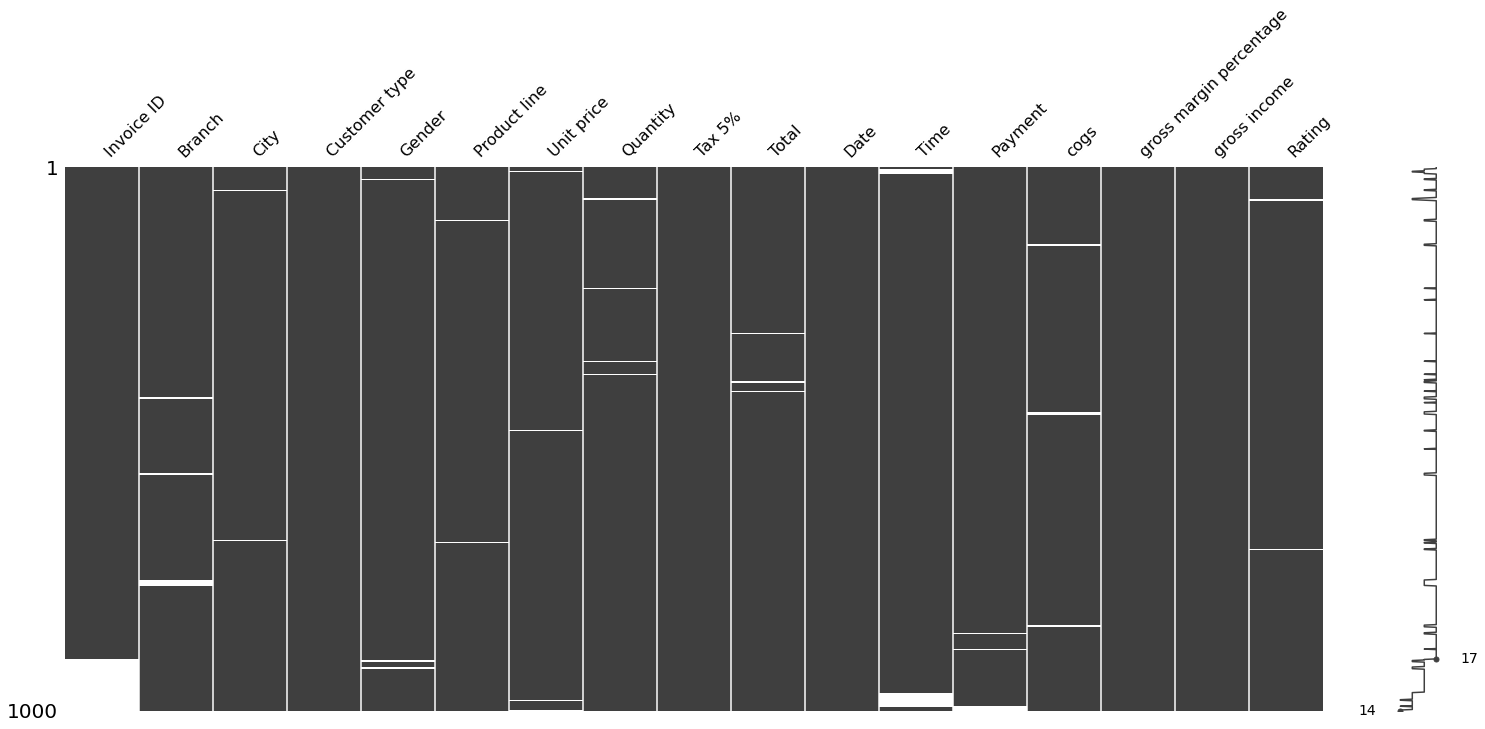

In [16]:
msno.matrix(df)

In [17]:
unitprice_null = df[df['Unit price'].isnull()].index

for i in unitprice_null:
    df.at[i,'Unit price'] = (df.at[i,'Total'] - df.at[i,'Tax 5%'])/df.at[i,'Quantity']

total_null = df[df['Total'].isnull()].index

for i in total_null:
    df.at[i,'Total'] = (df.at[i,'Unit price'] * df.at[i,'Quantity']) + df.at[i,'Tax 5%']

quantity_null = df[df['Quantity'].isnull()].index

for i in quantity_null:
    df.at[i,'Quantity'] =round(( df.at[i,'Total'] - df.at[i,'Tax 5%'])/df.at[i,'Unit price'] )
    
branch_null = df[df['Branch'].isnull()].index

for i in branch_null:
    if(df.at[i,'City']=='Yangon'): df.at[i,'Branch']= 'A'
    elif (df.at[i,'City']=='Mandalay'): df.at[i,'Branch']= 'B'
    elif (df.at[i,'City']=='Naypyitaw'): df.at[i,'Branch']= 'C'

city_null = df[df['City'].isnull()].index

for i in city_null:
    if(df.at[i,'Branch']=='A'): df.at[i,'City']= 'Yangon'
    elif (df.at[i,'Branch']=='B'): df.at[i,'City']= 'Mandalay'
    elif (df.at[i,'Branch']=='C'): df.at[i,'City']= 'Naypyitaw'
    
        



In [18]:
# Columns with missing values:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage     0
gross income                1
Rating                      6
dtype: int64

<AxesSubplot:>

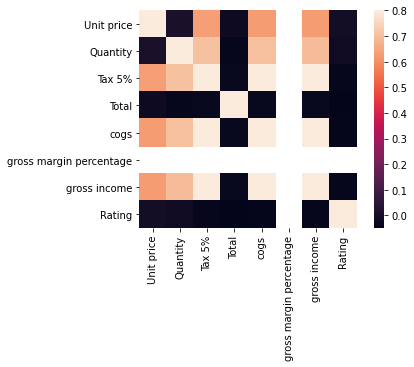

In [19]:
#msno.heatmap(df)
num_col=df.select_dtypes(include=[np.number])
correlation=num_col.corr()

#f, ax =plt.subplots(figsize=(14,12))
sns.heatmap(correlation,square=True,vmax=0.8)
#sns.heatmap(df.corr(), cmap= 'coolwarm')

Observe that cogs has a positive correlation with Tax 5%. We'll try to figure out the median value of cogs using the the column of Tax 5%


In [20]:
# cogs_null = df[df['cogs'].isnull()].index

# for i in cogs_null:
#     print("Tax value where cogs is nul isss ")
#     print(df.at[i,'Tax 5%'])
#     df_test=df.loc[df['Tax 5%'] == df.at[i,'Tax 5%']]
#     print(df_test)
#     print("\n")
#     df_test=df_test['cogs']
#     df.at[i,'cogs']=df_test.median()
   

The above code where I used Tax 5% to fillin missing values wasn't useful, every null corresponds to a tax value which is not repeated more than once thus finding median was impossible.<br>
Now I'll just replace the null values of cogs with the median of it's own column

## identifying most appropriate technique for missing values imputation

In [21]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      9
Product line                5
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                       35
Payment                    13
cogs                       11
gross margin percentage     0
gross income                1
Rating                      6
dtype: int64

<Figure size 1000x500 with 0 Axes>

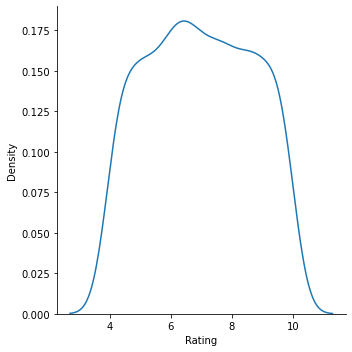

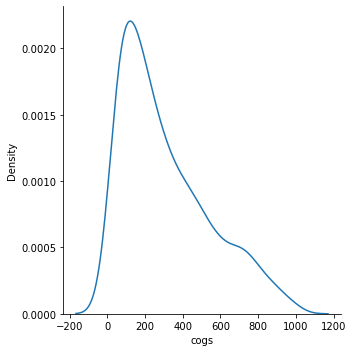

In [22]:
plt.figure(figsize=(10, 5), dpi = 100)
sns.displot(df, x="Rating", kind="kde")
sns.displot(df, x="cogs", kind="kde")

Note that Rating is flat topped Gaussian distribution curve, thus I'll use mean to fill in the missing values.
However, cogs is a positively skewed distribution thus we'll use median to fill in missing values. <br><br>
I am also replacing null values in categorical column with their modes

In [23]:
rating_null = df[df['Rating'].isnull()].index

for i in rating_null:
    df.at[i,'Rating'] = df['Rating'].mean()

cogs_null = df[df['cogs'].isnull()].index

for i in cogs_null:
    df.at[i,'cogs'] = df['cogs'].mean()
    
gender_null = df[df['Gender'].isnull()].index

for i in gender_null:
    df.at[i,'Gender'] = df['Gender'].mode()
    
product_null = df[df['Product line'].isnull()].index

for i in product_null:
    df.at[i,'Product line'] = df['Product line'].mode()
    
payment_null = df[df['Payment'].isnull()].index

for i in payment_null:
    df.at[i,'Payment'] = df['Payment'].mode()
    
time_null = df[df['Time'].isnull()].index

for i in time_null:
    df.at[i,'Time'] = df["Time"].interpolate(method='linear', limit_direction='forward', axis=0)

In [24]:
df.isna().sum()

Invoice ID                 95
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                1
Rating                      0
dtype: int64

Deleting Invoice ID as the column has all unique values. It will not help us in statiscal analysis

In [25]:
del df["Invoice ID"]

In [26]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if (np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v) or np.issubdtype(np.float32, v)):
            num_columns.append(k)

   
    return num_columns

In [27]:
def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v) or np.issubdtype(np.float32, v)):
            cat_columns.append(k)

    
    return cat_columns
    

In [28]:
numeric_columns = get_num_cols(df)
print(numeric_columns)
categorical_columns = get_cat_cols(df)
print(categorical_columns)


['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


### Outliers

In [29]:
# Box Plot
def box_plots(num_cols, df):
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x = df[num_cols[i]])

# Distribution plots
def dis_plots(num_cols, df): 
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5))
        sns.displot(df, x=df[num_cols[i]], kind="kde")
        
      



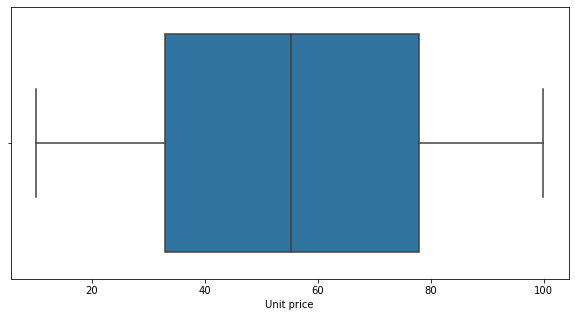

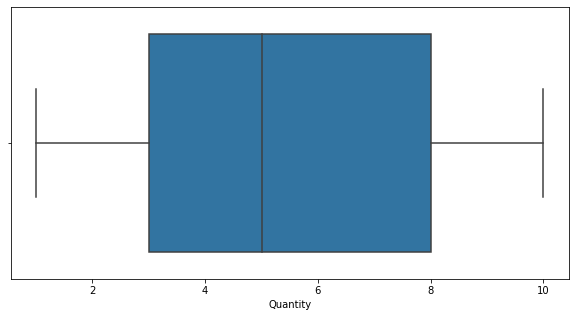

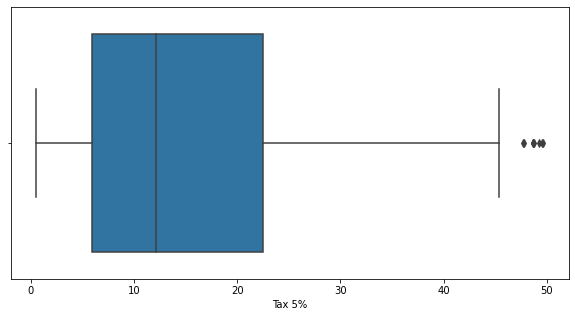

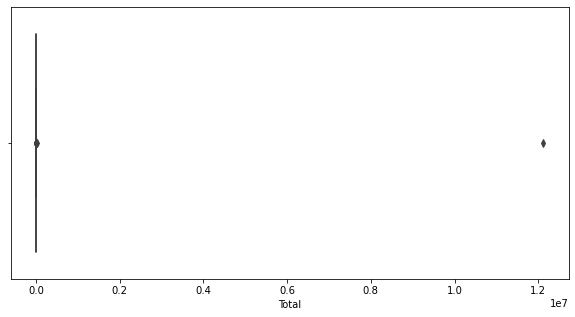

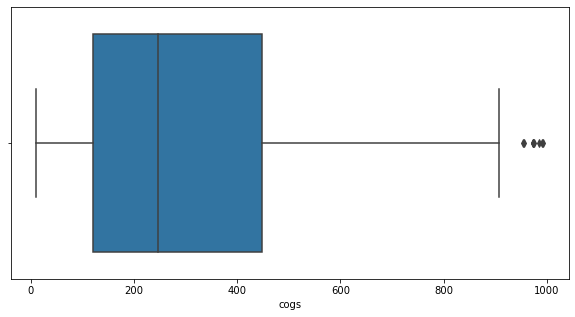

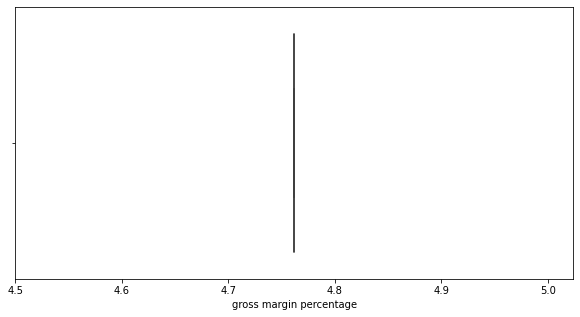

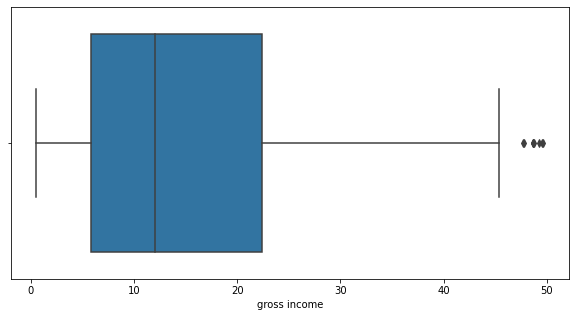

In [30]:
box_plots(numeric_columns, df)


### The weirdest box plot is of Total column.<br>
A single outlier is disturbing the distribution of the whole column. Let's identify and remove it.

In [31]:
median=df['Total'].median()
df['Total'].replace(12121555.0,median,inplace=True)


<AxesSubplot:>

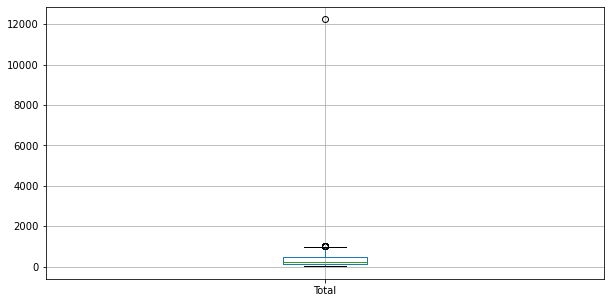

In [32]:
plt.figure(figsize=(10, 5))
df.boxplot(column=['Total'])

<AxesSubplot:>

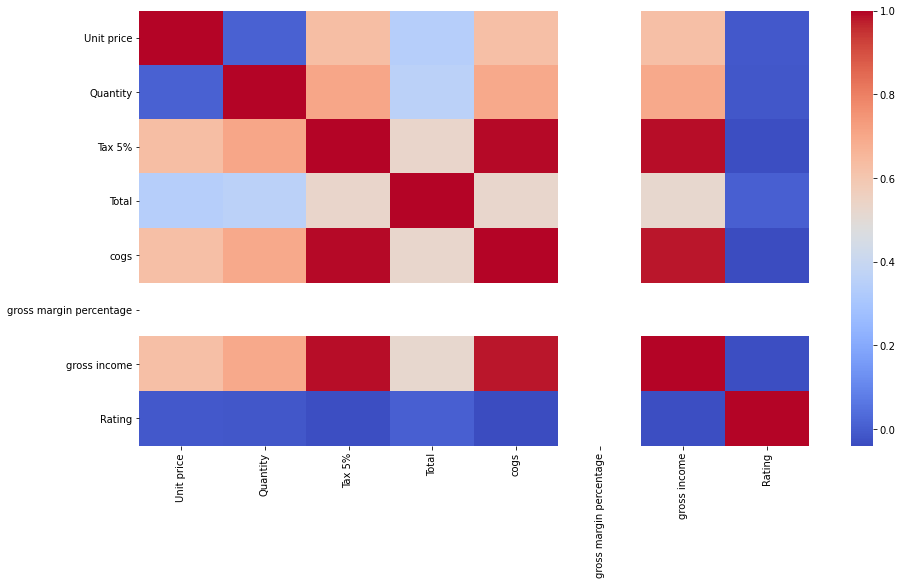

In [33]:

fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sns.heatmap(df.corr(), cmap= 'coolwarm')

### Summary of Numerical data:

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923442,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,335.199097,449.721436,10.678500,125.401499,255.157867,472.820251,12234.000000
cogs,1000.0,308.662103,232.806359,10.170000,120.895000,246.880000,448.560000,993.000000
gross margin percentage,1000.0,4.761916,0.000011,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,999.0,15.288853,11.704399,0.508500,5.789500,12.060000,22.427999,49.650002
Rating,1000.0,6.968612,1.711014,4.000000,5.500000,6.968612,8.400000,10.000000


## Inferential Analysis

### T-Test
Between 2 Numerical columns, to determine whether two variables are dependent on eachother or not

In [35]:
# T-Test

def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v) or np.issubdtype(np.float32, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            if(p_val<0.05):
                print("Dependent (reject H0) \t(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                   print('Independent (fail to reject H0)',num_columns[i], num_columns[j])


In [36]:
t_test(df)
##Displaying only those results where t-test result is significant i.e., variables are dependant and H0 rejected


 --------Unit price--------
Dependent (reject H0) 	(Unit price,Quantity) => t-value=59.510051613050244, p-value=0.0
Dependent (reject H0)
Dependent (reject H0) 	(Unit price,Tax 5%) => t-value=43.98757503527701, p-value=3.8136668305590433e-296
Dependent (reject H0)
Dependent (reject H0) 	(Unit price,Total) => t-value=-19.62129054316039, p-value=1.5673823049468401e-78
Dependent (reject H0)
Dependent (reject H0) 	(Unit price,cogs) => t-value=-34.14397705675708, p-value=1.1286306401936953e-201
Dependent (reject H0)
Dependent (reject H0) 	(Unit price,gross margin percentage) => t-value=60.764116405907174, p-value=0.0
Dependent (reject H0)
Independent (fail to reject H0) Unit price gross income
Dependent (reject H0) 	(Unit price,Rating) => t-value=58.00945266152835, p-value=0.0
Dependent (reject H0)

 --------Quantity--------
Dependent (reject H0) 	(Quantity,Tax 5%) => t-value=-25.86095205462542, p-value=1.9210527355868794e-127
Dependent (reject H0)
Dependent (reject H0) 	(Quantity,Total) =

### This t test clearly reflects that all numerical columns are independent of gross income.
Other than that they are dependent on mostly all other columns.
Total is also independent of cogs.

### Chi-Square Test
Between 2 categorical variables



I am changing all categorical columns datatype from object to string, as without doing so, it gives an error in chi-square test.

In [37]:
df['Gender'] = df['Gender'].astype('str')
df['Branch'] = df['Branch'].astype('str')
df['City'] = df['City'].astype('str')
df['Customer type'] = df['Customer type'].astype('str')
df['Product line'] = df['Product line'].astype('str')
df['Date'] = df['Date'].astype('str')
df['Payment'] = df['Payment'].astype('str')

In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    #cat_cols.remove('Time')
    for i in range(len(cat_cols)):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(len(cat_cols)):
            cat_var1 = cat_cols[i]
            
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")
            
chi_square_test(categorical_columns,df)


	 --------Branch--------
Branch    A    B    C
Branch               
A       340    0    0
B         0  332    0
C         0    0  328
dof=4
[[115.6   112.88  111.52 ]
 [112.88  110.224 108.896]
 [111.52  108.896 107.584]]
significance=0.050, p=0.000
Dependent (reject H0)


City    Mandalay  Naypyitaw  Yangon
Branch                             
A              0          0     340
B            332          0       0
C              0        328       0
dof=4
[[112.88  111.52  115.6  ]
 [110.224 108.896 112.88 ]
 [108.896 107.584 111.52 ]]
significance=0.050, p=0.000
Dependent (reject H0)


Customer type  Member  Normal
Branch                       
A                 167     173
B                 165     167
C                 169     159
dof=2
[[170.34  169.66 ]
 [166.332 165.668]
 [164.328 163.672]]
significance=0.050, p=0.811
Independent (fail to reject H0)


Gender  0    Male\ndtype: object  Female  Male
Branch                                        
A                              2  

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Branch is dependent on City <br>
Payment is dependent on Date

### Anova

I am renaming the column where column names have spaces, Anova is unable to recognize them as column names otherwise <br>
Time column is giving issues again thus dropping that column for anova analysis.

In [39]:
df = df.rename(columns={'Unit price': 'Unitprice'})
df = df.rename(columns={'Tax 5%': 'tax5'})
df = df.rename(columns={'gross margin percentage': 'gmp'})
df = df.rename(columns={'gross income': 'gincome'})
df = df.rename(columns={'Customer type': 'customertype'})
df = df.rename(columns={'Product line': 'productline'})

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    cat_cols.remove('Time')
    for i in range(len(num_cols)):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()
            
anova_test(get_num_cols(df), get_cat_cols(df), df)


ANOVA => Unitprice - Branch
                 sum_sq     df         F    PR(>F)
Branch       558.051191    2.0  0.397012  0.672432
Residual  700705.314783  997.0       NaN       NaN


ANOVA => Unitprice - City
                 sum_sq     df         F    PR(>F)
City         558.051191    2.0  0.397012  0.672432
Residual  700705.314783  997.0       NaN       NaN


ANOVA => Unitprice - customertype
                     sum_sq     df        F    PR(>F)
customertype     287.217553    1.0  0.40892  0.522665
Residual      700976.148422  998.0      NaN       NaN


ANOVA => Unitprice - Gender
                 sum_sq     df         F   PR(>F)
Gender      2050.039653    2.0  1.461564  0.23237
Residual  699213.326322  997.0       NaN      NaN


ANOVA => Unitprice - productline
                    sum_sq     df         F    PR(>F)
productline    1414.261876    6.0  0.334444  0.918899
Residual     699849.104099  993.0       NaN       NaN


ANOVA => Unitprice - Date
                 sum_sq     df    

Total and Date have p value 0.04 thus it is dependent on each other <br>
gmp and branch have p value 7.524241e-08 thus it is dependent on each other<br>
gmp and City have p value 2.164193e-26 thus it is dependent on each other<br>
gmp and customertype have p value 1.791699e-19 thus it is dependent on each other<br>
gmp and gender have p value 7.363413e-166 thus it is dependent on each other<br>
gmp and product line has p value 1.543131e-62 thus it is dependent on each other<br>
gmp and date has p value 1.838061e-43 thus it is dependent on each other<br>

## datawarehousing analysis 
<br>
The attributes we should not proceed with in the fact table include: <br>
    1)Invoice ID - (all 1000 values are unique and don't provide us witha ny useful insight) <br>
    2)Branch - (City column will be enough to gather branch information so need for Branch column) <br>
    3)Unit price, Quantity and Tax 5% - (These are all related to the formula where Total is involved, Total column will be enough for analysis) <br>
    4)gross margin percentage - (it has a constant value through the dataset) <br><br>
    
Attributes such as Date,Time,Product line, etc can be used in Dimension Table
